Accuracy: 0.90

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       752
           1       0.87      0.87      0.87       456

    accuracy                           0.90      1208
   macro avg       0.90      0.90      0.90      1208
weighted avg       0.90      0.90      0.90      1208



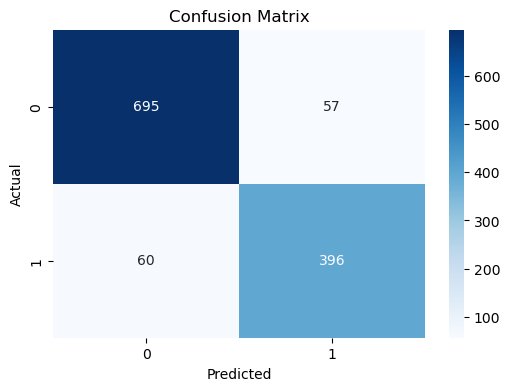

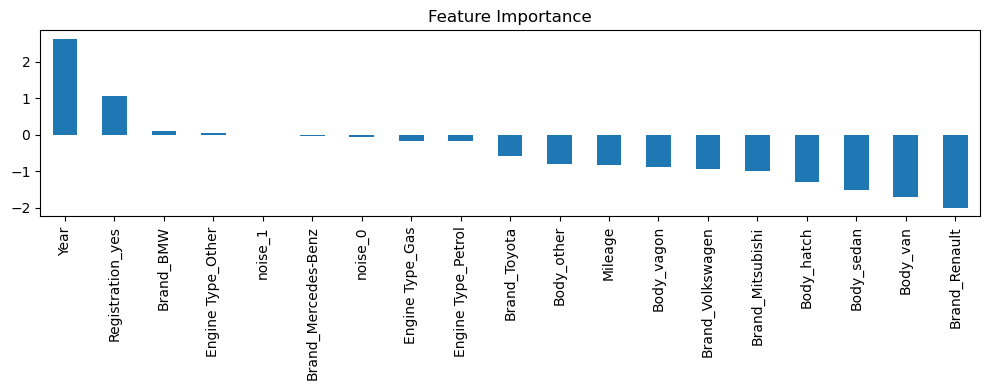

In [3]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 2: Load Dataset
df = pd.read_csv(r"C:\Users\Sujit\Desktop\CarDataset app\1.04. Real-life example.csv")  # Replace with actual file path
df = df.dropna()

# Step 3: Create Binary Target
df["Target"] = (df["Price"] > 15000).astype(int)

# Step 4: Drop High Cardinality Column
if "Model" in df.columns:
    df = df.drop("Model", axis=1)

# Step 5: Encode Categorical Features
df_encoded = pd.get_dummies(df, drop_first=True)

# Step 6: Feature Selection (Reduce accuracy slightly)
X = df_encoded.drop("Target", axis=1)
y = df_encoded["Target"]

# Drop strong predictors
for col in ["Price", "EngineV"]:
    if col in X.columns:
        X = X.drop(col, axis=1)

# Retain moderately predictive features
for col in ["Mileage", "Year"]:
    if col in df_encoded.columns:
        X[col] = df_encoded[col]

# Add some noise features
for i in range(2):
    np.random.seed(i)
    X[f"noise_{i}"] = np.random.rand(X.shape[0])

# Step 7: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

# Step 8: Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 9: Train Logistic Regression Model
model = LogisticRegression(max_iter=100, C=0.5, solver='liblinear')
model.fit(X_train, y_train)

# Step 10: Evaluate Model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 11: Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 12: Feature Importance
importance = pd.Series(model.coef_[0], index=X.columns)
importance.sort_values(ascending=False).plot(kind="bar", figsize=(10, 4), title="Feature Importance")
plt.tight_layout()
plt.show()
